# TITANIC - MACHINE LEARNING FROM DISATER




# **1. Introduction**

Vụ chìm tàu Titanic là một trong những vụ đắm tàu khét tiếng nhất trong lịch sử.

Vào ngày 15 tháng 4 năm 1912, trong chuyến hải trình đầu tiên, tàu RMS Titanic, được coi là "không thể chìm", đã chìm sau khi va phải một tảng băng trôi. Thật không may, không có đủ thuyền cứu sinh cho tất cả mọi người trên tàu, dẫn đến cái chết của 1502 trong số 2224 hành khách và thủy thủ đoàn.

Mặc dù việc sống sót có một phần do may mắn, dường như một số nhóm người có khả năng sống sót cao hơn những nhóm khác.

Trong thử thách này, chúng ta phải xây dựng một mô hình dự đoán trả lời câu hỏi: “những loại người nào có khả năng sống sót cao hơn?” sử dụng dữ liệu hành khách (như tên, tuổi, giới tính, tầng lớp kinh tế xã hội, v.v.).

# **2. Loading the Data**

In [ ]:
# import lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# mount gg drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/Work/Titanic/titanic/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Work/Titanic/titanic/test.csv')

In [ ]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


**NOTE**
1. sibsp: # of siblings / spouses aboard the Titanic
2. parch:	# of parents / children aboard the Titanic



In [ ]:
# preview data
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_train.set_index(df_train.PassengerId, inplace=True)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_train.drop('PassengerId', axis =1, inplace= True)

In [ ]:
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/Work/Titanic/titanic/test.csv', index_col='PassengerId')

In [ ]:
df_test.tail()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


**2.1. Feature Classification**

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


**NOTE:**
Blank or Null value: Age, Cabin, Embarked

In [ ]:
# covert các cột có dtype số sang category dựa trên đánh giá cá nhân
df_train['Survived'] = df_train['Survived'].astype("category")
df_train['Survived'].dtype

CategoricalDtype(categories=[0, 1], ordered=False)

In [ ]:
# create def cho các columns còn lại
features = ["Pclass","Sex","SibSp","Parch","Embarked"]
def convert_cat(df, features):
  for feature in features:
    df[feature] = df[feature].astype("category")
convert_cat(df_train, features)
convert_cat(df_test, features)
# chuyển đổi dữ liệu nhằm mục đích phân loại các numerical và categorical

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB


**2.2. Distribution of Numerical features**



In [ ]:
df_train.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


**2.3. Distribution of Categorical features**

In [ ]:
df_train.describe(include=['category'])

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644




*   **Survived**: tổng 891, có 2 giá trị duy nhất là 0 và 1, top là 0, freg là 549 nghĩa là có 549 người mất trên chuyến tàu
*   **Pclass**: tổng 891, có 3 giá trị là 1, 2 và 3 tương ứng với 3 hạng vé, top là 3 cũng là loại vé lower- hạng vé được chọn mua nhiều nhất 491
*   **Sex**: tổng 891, có 2 giá trị 0 và 1 tương ứng male và female, top là male, nghĩa có 577 nam trên tàu
*   **Embarked**: Tổng 889, có 3 giá trị C(Cherbourg), Q(Queenstown) và S(Southampton), top là S và freg là 644, nghĩa có 644 người lên tàu từ cảng Southampton





# **3. Exploratory Data Analysis (EDA)**

**3.1. Correlating categorical features**


**Biến mục tiêu là Survived**

In [ ]:
df_train['Survived'].value_counts().to_frame()

,Survived
0,549
1,342


In [ ]:
df_train['Survived'].value_counts(normalize=True).to_frame()

,Survived
0,0.616162
1,0.383838


Chỉ có 38% số người sống xót sau thảm họa tàu Titanic

**Sex**

In [ ]:
df_train['Sex'].value_counts(normalize=True).to_frame()

,Sex
male,0.647587
female,0.352413


Tỷ lệ sống xót sau thảm họa giữa nam và nữ ?

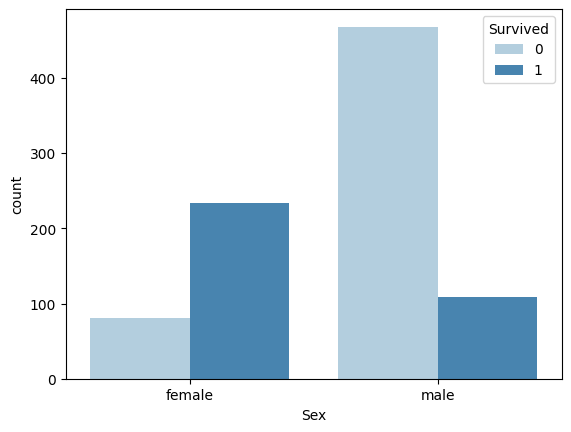

In [ ]:
sns.countplot(data=df_train, x='Sex', hue='Survived', palette='Blues');

Sau khi trực quan hóa và so sánh giữa tỷ lệ sống xót giữa nam và nữ thì ta có thể thấy rõ việc tỷ lệ nam sống xót ít hơn nữ gần một nửa, giải thích điều này lúc xảy ra thảm họa thì mọi người trên tàu lúc ấy luôn ưu tiên **phụ nữ** và **trẻ em** được sống

**Remaining Categorical Features Columns**

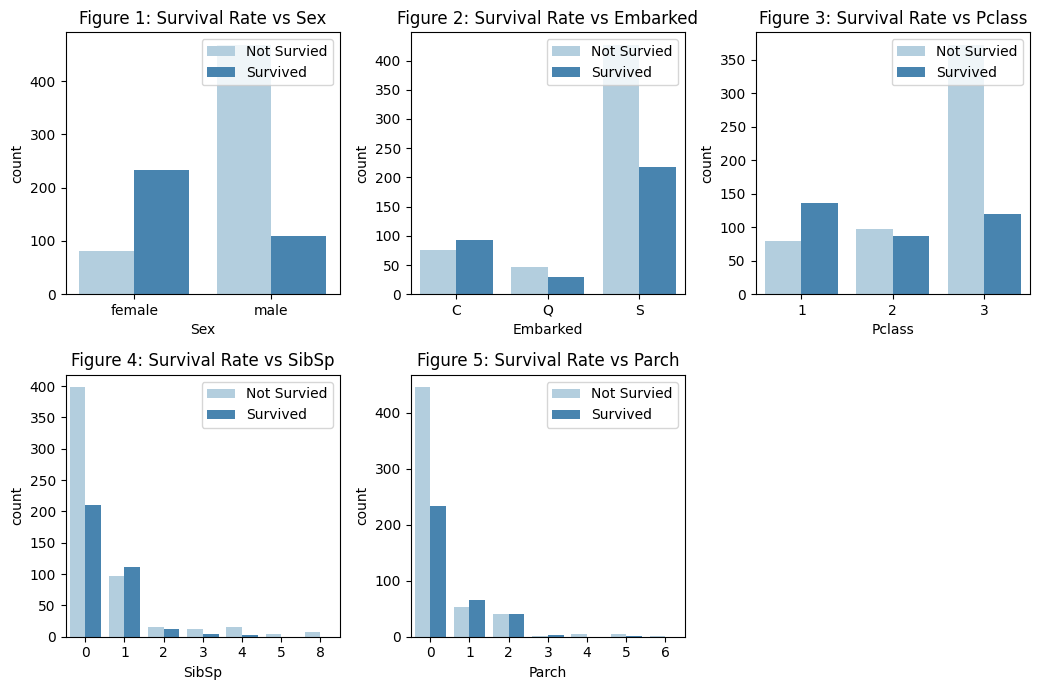

In [ ]:
cols = ['Sex', 'Embarked', 'Pclass', 'SibSp', 'Parch']

n_rows = 2 # Tạo 2 hàng
n_cols = 3 # Tạo 3 cột

fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.5, n_rows*3.5))

for r in range (0, n_rows):
  for c in range (0, n_cols):
    i = r*n_cols + c          # Đặt index để vòng lặp chạy qua danh sách "cols"
    # 0*3 + 0 = 0 vẽ biểu đồ đầu tiên, tương ứng 'Sex'
    # 0*3 + 1 = 1 'Embarked'
    # 0*3 + 2 = 2 'Pclass'

    # 1*3 + 0 = 3 'SibSp'
    # 1*3 + 1 = 4 'Parch'
    if i < len(cols):
      ax_i = ax[r,c] # tương ứng hàng và cột để vẽ
      sns.countplot(data=df_train, x= cols[i], hue ='Survived', palette='Blues', ax=ax_i)
      ax_i.set_title(f"Figure {i+1}: Survival Rate vs {cols[i]}")
      ax_i.legend(title='', loc= 'upper right', labels=['Not Survied', 'Survived'])
ax.flat[-1].set_visible(False) # xóa biểu đồ dư cuối cùng
plt.tight_layout()

**Observation:**
**Đánh giá tỷ lệ sống xót:**



* **Biểu đồ 1:** Tỷ lệ sống xót của phụ nữ
cao hơn đàn ông

* **Biểu đồ 2:** Hầu hết là những người lên từ cảng Southampton có số lượng người không thể sống xót cao nhất

* **Biểu đồ 3:** Vé tàu hạng 1 có tỷ lệ sống xót cao nhất, so với vé hạng 2 và 3 tương ứng middle và lower thì có tỷ lệ sống xót không cao

* **Biểu đồ 4:** Người đi với 0 SibSp thì gần như không sống xót nhiều, những người đi với 1-2 người trong gia đình thì có cơ hội sống xót cao hơn

* **Biểu đồ 5:** Tương tự với biểu đồ 4 thì những người đi với 0 Parch thì gần như không sống xót nhiều















**3.2. EDA for Numerical Features**

**Age**

<Axes: xlabel='Age', ylabel='Count'>

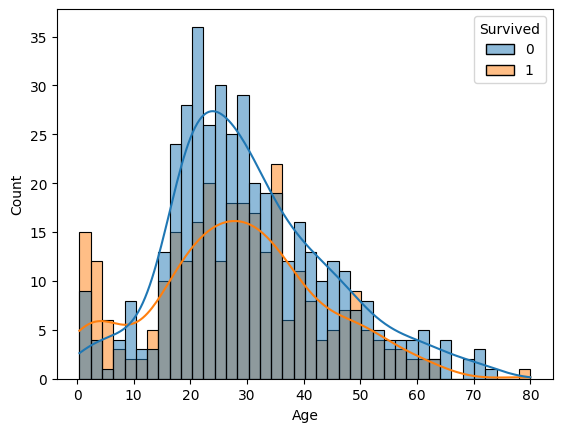

In [ ]:
sns.histplot(data=df_train, x = 'Age', hue ='Survived', bins= 40, kde = True)




*   Ta có thể thấy rõ độ tuổi của các hành khách trên tàu rơi vào từ khoảng 16 đến 35
*   Khi so sánh độ tuổi với tỷ lệ sống xót thì ta có thể thấy ở trẻ nhỏ thì có tỷ lệ sống xót cao hơn



**Fare**

In [ ]:
df_train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: xlabel='Fare', ylabel='Count'>

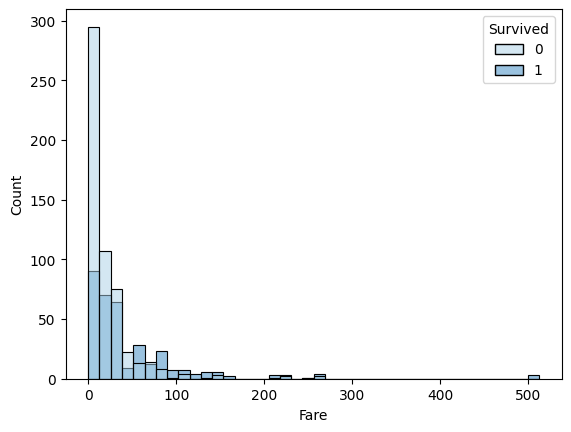

In [ ]:
sns.histplot(data=df_train, x = 'Fare', hue ='Survived', bins= 40, palette='Blues')

In [ ]:
# Chia dữ liệu thành 4 khoảng, rồi đặt tên

pd.qcut(df_train['Fare'], 4)

PassengerId
1       (-0.001, 7.91]
2      (31.0, 512.329]
3       (7.91, 14.454]
4      (31.0, 512.329]
5       (7.91, 14.454]
            ...       
887     (7.91, 14.454]
888     (14.454, 31.0]
889     (14.454, 31.0]
890     (14.454, 31.0]
891     (-0.001, 7.91]
Name: Fare, Length: 891, dtype: category
Categories (4, interval[float64, right]): [(-0.001, 7.91] < (7.91, 14.454] < (14.454, 31.0] <
                                           (31.0, 512.329]]

**Ta chia dữ liệu vào 4 khoảng 0-25, 25-50, 50-75, 75-100**

Ta có thể thấy
*   hành khách thứ nhất mua vé với giá 7.2500 nằm trong khoảng  (-0.001, 7.91]
*   hành khách thứ hai mua vé với giá 71.2833 nằm trong khoảng  (31.0, 512.329]
*   hành khách thứ ba mua vé với giá 7.9250 nằm trong khoảng  (7.91, 14.454]



In [ ]:
df_train['Fare']

PassengerId
1       7.2500
2      71.2833
3       7.9250
4      53.1000
5       8.0500
        ...   
887    13.0000
888    30.0000
889    23.4500
890    30.0000
891     7.7500
Name: Fare, Length: 891, dtype: float64

**Tiếp tục đặt tên cho 4 khoảng dữ liệu**

Đối với histogram plot phía trên ta nhìn dữ liệu rất rời rạc, thay vào đó ta chia dữ liệu dữ liệu hạng vé vào 4 khoảng và đem so sánh với Survived để có thể thấy rõ hơn

<Axes: xlabel='Fare', ylabel='count'>

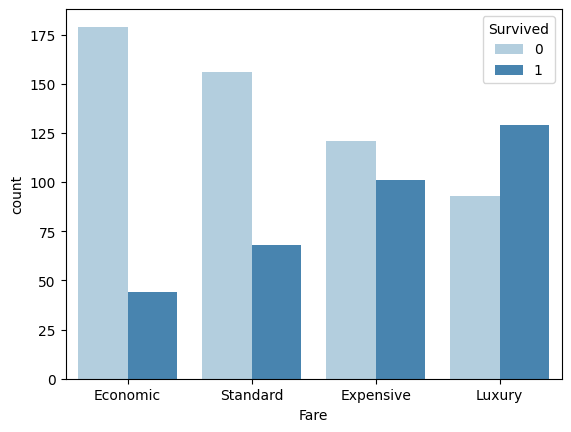

In [ ]:
fare_categories = ['Economic','Standard','Expensive','Luxury']
quartile_data = pd.qcut(df_train['Fare'], 4, labels= fare_categories)

sns.countplot(x=quartile_data, hue=df_train['Survived'], palette="Blues")

*   Hạng vé Economic thì có tỷ lệ sống xót cực kỳ thấp
*   Hạng vé Standard có tỷ lệ sống xót cao hơn hạng Economic không nhiều
*   Hạng vé Luxury thì có tỷ lệ sống xót cao nhất, rất đáng kể
*   Còn hạng Expensive thì chênh lệch không nhiều nhưng đối với 2 hạng Economic và Standard thì Expensive có tỷ lệ sống xót cao





**1.   Phân bố giá vé**

*   Giá hạng vé không phân bố thông thường mà nó tạo nên một mũi nhọn trong khoảng giá từ 0 đến 100$

*   Sự phân bố nghiêng về bên trái với 75% vé dưới 31 đô và giá cao nhất lên đến 512 đô


**2.   Biểu đồ tứ phân vị**


*   Những hành khách mua vé với giá cao trong khoảng Expensive và Luxury thì có nhiều cơ hội sống xót hơn so với 2 hạng vé giá rẻ




